# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
# Your code here
df = pd.read_csv('data/ames.csv', usecols=['SalePrice','TotRmsAbvGrd','OverallCond','YrSold','YearBuilt','LandSlope'])

The following code checks that you loaded the data correctly:

In [3]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
#assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [4]:
# Run this cell without changes
df.head()

,LandSlope,OverallCond,YearBuilt,TotRmsAbvGrd,YrSold,SalePrice
0,Gtl,5,2003,8,2008,208500
1,Gtl,8,1976,6,2007,181500
2,Gtl,5,2001,6,2008,223500
3,Gtl,5,1915,7,2006,140000
4,Gtl,5,2000,9,2008,250000


In [5]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LandSlope     1460 non-null   object
 1   OverallCond   1460 non-null   int64 
 2   YearBuilt     1460 non-null   int64 
 3   TotRmsAbvGrd  1460 non-null   int64 
 4   YrSold        1460 non-null   int64 
 5   SalePrice     1460 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 68.6+ KB


## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

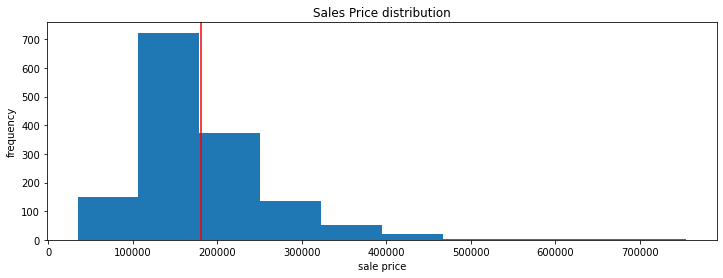

In [6]:
# Your code here
fig, ax = plt.subplots(figsize=(12,4))
ax.hist(df['SalePrice'])
ax.set_xlabel('sale price')
ax.set_ylabel('frequency')
ax.set_title('Sales Price distribution')
ax.axvline(df['SalePrice'].mean(), c='red')


Now, print out the mean, median, and standard deviation:

In [7]:
# Your code here
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In the cell below, interpret the above information.

In [8]:
# Replace None with appropriate text
"""
Most of the houses sold for a price range of 10k to 20k with the average house price being 18k.
"""

'\nMost of the houses sold for a price range of 10k to 20k with the average house price being 18k.\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

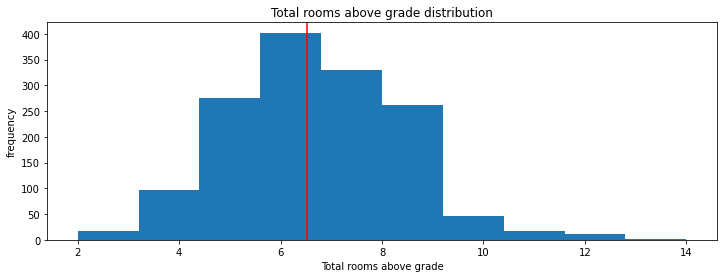

In [9]:
# Your code here
# Your code here
fig, ax = plt.subplots(figsize=(12,4))
ax.hist(df['TotRmsAbvGrd'])
ax.set_xlabel('Total rooms above grade')
ax.set_ylabel('frequency')
ax.set_title('Total rooms above grade distribution')
ax.axvline(df['TotRmsAbvGrd'].mean(), c='red')

Now, print out the mean, median, and standard deviation:

In [10]:
# Your code here
df['TotRmsAbvGrd'].describe()

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

In the cell below, interpret the above information.

In [11]:
# Replace None with appropriate text
"""
Most of the houses sold were of the 6 bedroom nature.
"""

'\nMost of the houses sold were of the 6 bedroom nature.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

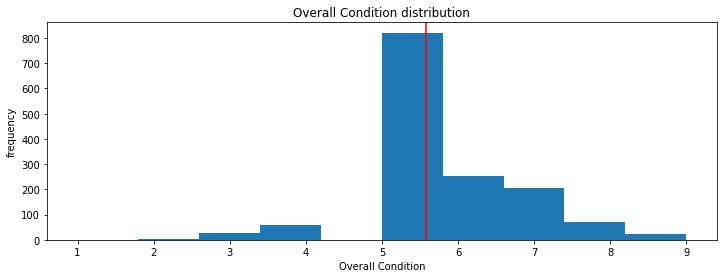

In [12]:
# Your code here
fig, ax = plt.subplots(figsize=(12,4))
ax.hist(df['OverallCond'])
ax.set_xlabel('Overall Condition')
ax.set_ylabel('frequency')
ax.set_title('Overall Condition distribution')
ax.axvline(df['OverallCond'].mean(), c='red')

Now, print out the mean, median, and standard deviation:

In [13]:
# Your code here
df['OverallCond'].describe()

count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

In the cell below, interpret the above information.

In [14]:
# Replace None with appropriate text
"""
Most of the houses were average in overall condition.
"""

'\nMost of the houses were average in overall condition.\n'

Index(['LandSlope', 'OverallCond', 'YearBuilt', 'TotRmsAbvGrd', 'YrSold',
       'SalePrice'],
      dtype='object')

In [21]:
# Replace None with appropriate code
below_average_condition = df.loc[df['OverallCond'] < 5, ['LandSlope', 'OverallCond', 'YearBuilt', 'TotRmsAbvGrd', 'YrSold',
       'SalePrice']]
average_condition = df.loc[df['OverallCond'] == 5, ['LandSlope', 'OverallCond', 'YearBuilt', 'TotRmsAbvGrd', 'YrSold',
       'SalePrice']]
above_average_condition = df.loc[df['OverallCond'] > 5, ['LandSlope', 'OverallCond', 'YearBuilt', 'TotRmsAbvGrd', 'YrSold',
       'SalePrice']]

In [20]:
below_average_condition.head()

,LandSlope,OverallCond,YearBuilt,TotRmsAbvGrd,YrSold,SalePrice
30,Gtl,4,1920,6,2008,40000
69,Gtl,4,1953,7,2006,225000
88,Gtl,2,1915,6,2009,85000
91,Gtl,3,1961,6,2006,98600
104,Gtl,4,1931,7,2007,169500


The following code checks that you created the subsets correctly:

In [23]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 6
assert average_condition.shape[1] == 6
assert above_average_condition.shape[1] == 6

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

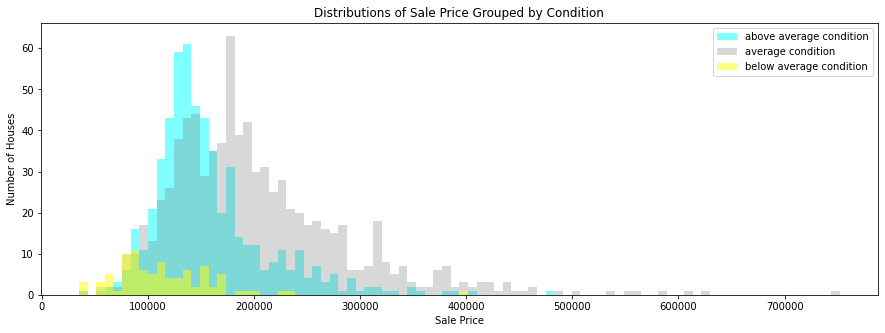

In [24]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [25]:
# Replace None with appropriate text
"""
- Houses with above average condition are cheaper than the average houses.
"""

'\n- Houses with above average condition are cheaper than the average houses.\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [26]:
# Your code here
df.corr(method='pearson')

,OverallCond,YearBuilt,TotRmsAbvGrd,YrSold,SalePrice
OverallCond,1.000000,-0.375983,-0.057583,0.043950,-0.077856
YearBuilt,-0.375983,1.000000,0.095589,-0.013618,0.522897
TotRmsAbvGrd,-0.057583,0.095589,1.000000,-0.034516,0.533723
YrSold,0.043950,-0.013618,-0.034516,1.000000,-0.028923
SalePrice,-0.077856,0.522897,0.533723,-0.028923,1.000000


In [27]:
import numpy as np
coef = np.corrcoef(df['TotRmsAbvGrd'], df['SalePrice'])
print('TotRmsAbvGrd is most positively correlated with Sale Price')
print(coef, 'is the value.')

TotRmsAbvGrd is most positively correlated with Sale Price
[[1.         0.53372316]
 [0.53372316 1.        ]] is the value.


Now, find the ***most negatively correlated*** column:

In [28]:
# Your code here
coef2 = np.corrcoef(df['OverallCond'], df['SalePrice'])
print('OverallCond is most negatively correlated with Sale Price')
print(coef2, 'is the value.')

OverallCond is most negatively correlated with Sale Price
[[ 1.         -0.07785589]
 [-0.07785589  1.        ]] is the value.


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

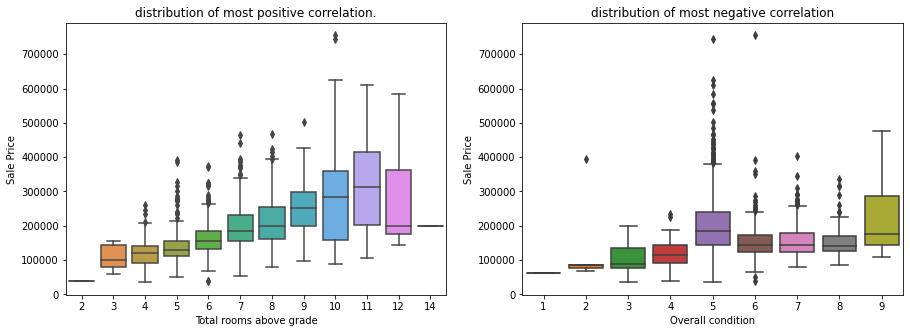

In [29]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df['TotRmsAbvGrd'],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df['OverallCond'],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title('distribution of most positive correlation.')
ax1.set_xlabel('Total rooms above grade')
ax1.set_ylabel("Sale Price")
ax2.set_title('distribution of most negative correlation')
ax2.set_xlabel('Overall condition')
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [ ]:
# Replace None with appropriate text
"""
- As the rooms increased, the price also increased a bit.
- As thr condiiton decreased, the price decreased a bit.
"""

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [30]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

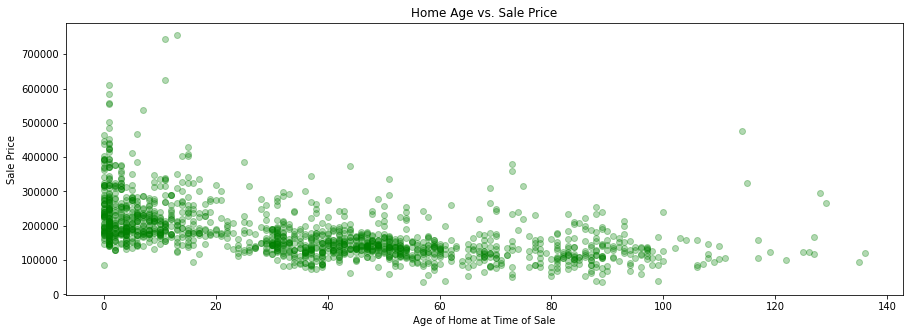

In [31]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [ ]:
# Replace None with appropriate text
"""
- The older the house, the more depreciation in sale price.
"""

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.